###  탐색 데이터 분석(Exploratory Data Analysis)
### 분석 대상
- 목적 : 입원 기간에 영향을 미치는 요인은 무엇인가?
- 목표변수 : 입원기간
- 설명변수 : 신장, 체중, 고혈압여부, 당뇨여부, 심혈관질환, 연령

### 상관관계 확인
1. 목표변수 : 입원기간
2. 설명변수
    - 신장 : 분포가 다양하게 퍼져있는 것으로 보임. 객관적인 수치를 통한 검즏 필요
    - 체중 : 분포가 다양하게 퍼져있는 것으로 보임. 객관적인 수치를 통한 검증 필요
    - 고혈압여부 : 고혈압이 있을 경우 입원기간이 상대적으로 더 많은 것으로 보임 
    - 당뇨여부 : 당뇨가 있을 경우 입원기간이 상대적으로 더 많은 것으로 보임
    - 심혈관질환 : 심혈관질환이 있을 경우 입원기간이 상대적으로 더 많은 것으로 보임
    - 연령 : 분포가 다양하게 퍼져있는 것으로 보임. 객관적인 수치를 통한 검증 필요

In [1]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_ROS = pd.read_csv('../../dataset/RecurrenceOfSurgery_quest.csv')
df_ROS.head(2)

,Unnamed: 0,고혈압여부,당뇨여부,성별,스테로이드치료,신장,심혈관질환,연령,입원기간,체중,환자통증정도,수술시간,재발여부
0,0,0,0,2,1,163,0,66,2,60.3,10,68.0,0
1,1,0,0,1,1,171,0,47,1,71.7,10,31.0,0


In [46]:
df_ROS_patient = df_ROS[['신장','체중','고혈압여부','당뇨여부','심혈관질환','연령','입원기간']]

In [47]:
df_ROS_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신장      1894 non-null   int64  
 1   체중      1894 non-null   float64
 2   고혈압여부   1894 non-null   int64  
 3   당뇨여부    1894 non-null   int64  
 4   심혈관질환   1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   입원기간    1894 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 103.7 KB


#### 목표변수 데이터 분포
- 목표변수(입원기간) - 범주형(밸런스 확인)
    * 결과 : 비정규분포

In [58]:
# 데이터 타입 변환(int -> str)
df_ROS_patient[['고혈압여부','당뇨여부','심혈관질환']] = df_ROS_patient[['고혈압여부','당뇨여부','심혈관질환']].astype(str)
df_ROS_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신장      1894 non-null   int64  
 1   체중      1894 non-null   float64
 2   고혈압여부   1894 non-null   object 
 3   당뇨여부    1894 non-null   object 
 4   심혈관질환   1894 non-null   object 
 5   연령      1894 non-null   int64  
 6   입원기간    1894 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 103.7+ KB


C:\Users\koreavc\AppData\Local\Temp\ipykernel_14564\668822120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_patient[['고혈압여부','당뇨여부','심혈관질환']] = df_ROS_patient[['고혈압여부','당뇨여부','심혈관질환']].astype(str)


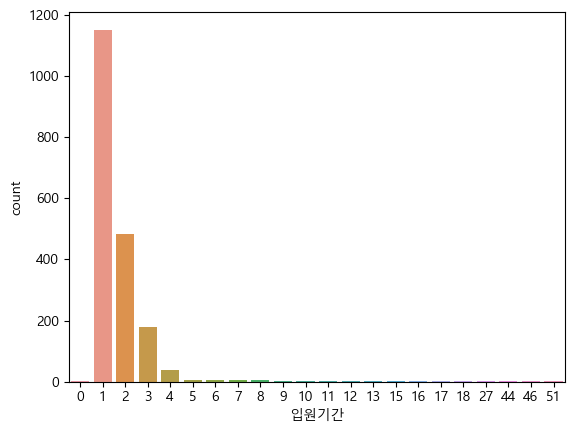

In [57]:
# sns.histplot(data=df_TOCC_choose, x='amount', kde=True)
sns.countplot(data=df_ROS_patient, x='입원기간')
plt.show()

#### 설명변수 데이터 분포

In [51]:
object_list = df_ROS_patient.describe(include=object).columns.to_list()
object_list

['고혈압여부', '당뇨여부', '심혈관질환']

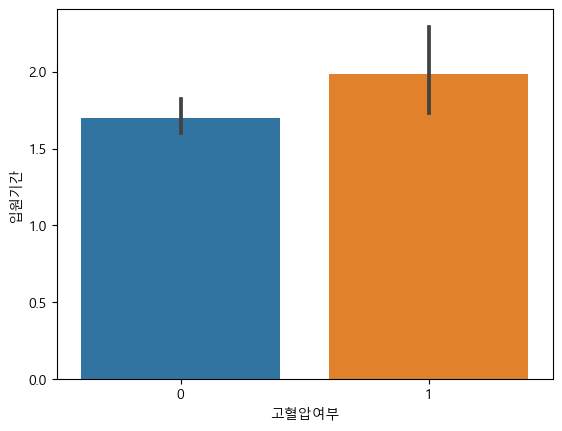

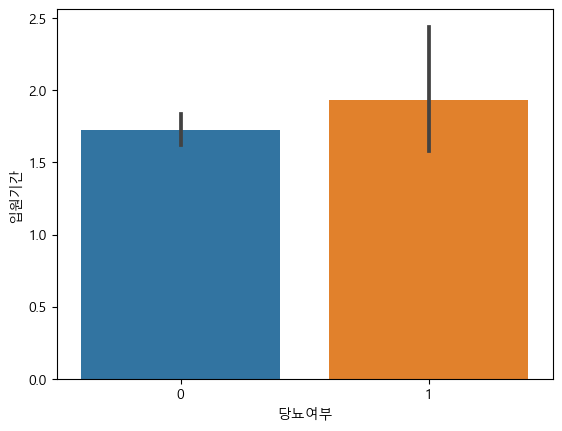

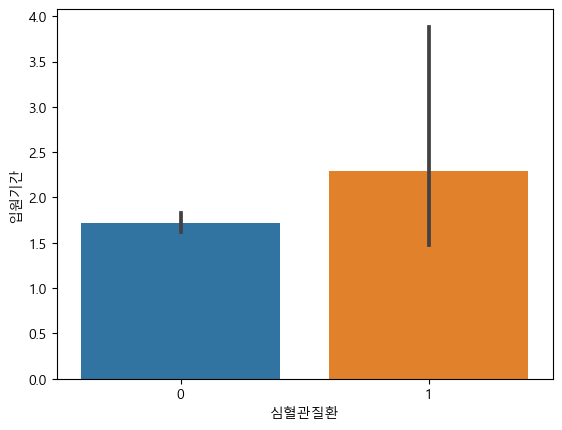

In [53]:
# 범주형/연속형
for item in object_list :
    sns.barplot(data=df_ROS_patient, x=item, y='입원기간')
    plt.show()

In [62]:
continues_list = df_ROS_patient.describe().drop(columns=['입원기간']).columns.to_list()
continues_list

['신장', '체중', '연령']

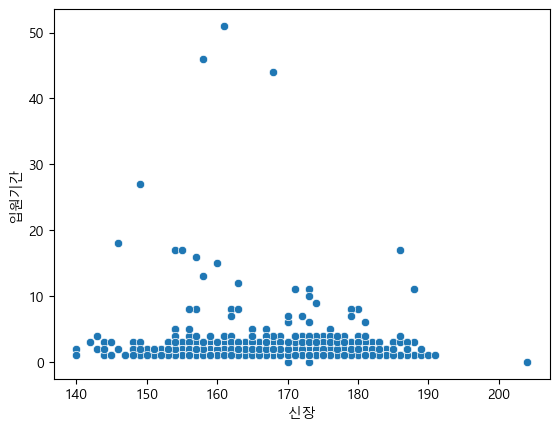

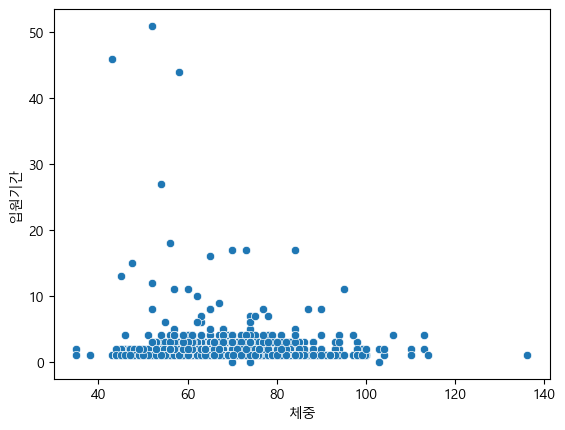

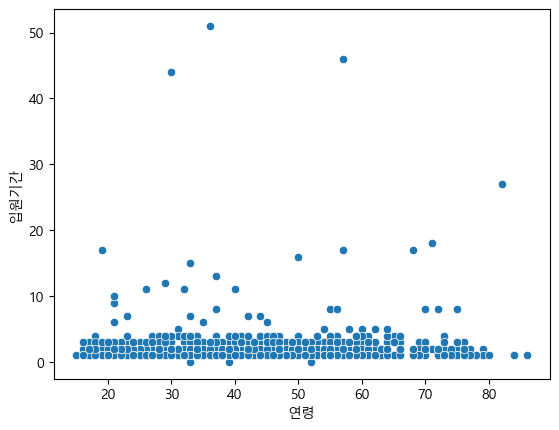

In [74]:
# 연속형/연속형
for item in continues_list :
    # sns.lineplot(data=df_ROS_patient, x=item, y='입원기간')
    sns.scatterplot(data=df_ROS_patient, x=item, y='입원기간')
    plt.show()

#### 연속형 / 연속형 상관계수 확인 -> 신장, 체중, 연령
- 1에 가까울수록 두개가 비슷하게 증가
- -1에 가까울수록 하나 증가/ 하나 감소
- 0에 가까울수록 두개간 관계가 없다     

- 결과
    * 신장/입원기간: 0.99, 관계 있음으로 확인됨
    * 체중/입원기간: 0.99, 관계 있음으로 확인됨
    * 연령/입원기간: 0.99, 관계 있음으로 확인됨

In [81]:
df_ROS_patient.describe().corr()

,신장,체중,연령,입원기간
신장,1.000000,0.998246,0.997243,0.996110
체중,0.998246,1.000000,0.999751,0.999299
연령,0.997243,0.999751,1.000000,0.999819
입원기간,0.996110,0.999299,0.999819,1.000000


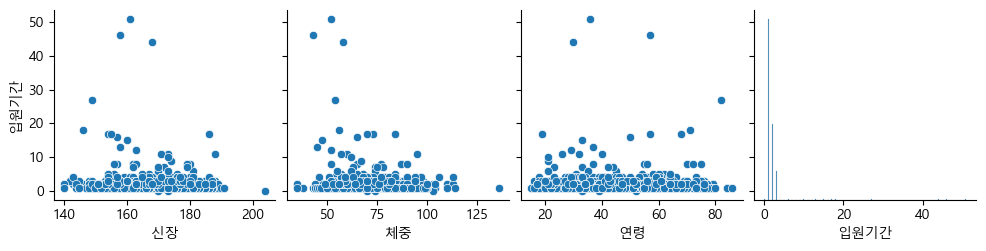

In [85]:
sns.pairplot(data=df_ROS_patient, y_vars='입원기간')